# Test of convergence in mesh spacing

The same problem is solved with decreased mesh spacing. Convergence to true solution is shown.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
from oedes import *
from oedes.fvm import mesh1d

In [2]:
params = {
    'T': 300.,
    'electrode0.voltage': 1.,
    'electrode1.voltage': 0,
    'electrode0.workfunction': 0.,
    'electrode1.workfunction': 0,
    'hole.mu': 1e-9,
    'hole.electrode0': 1e27,
    'hole.electrode1': 1e27,
    'epsilon_r': 3,
    'hole.level': 0,
    'hole.N0': 1e27
}

In [3]:
def test_scl(mesh, params, plot=False, plot_args=(), plot_kwargs={}):
    b = models.BaseModel()
    models.electronic_device(b, mesh, 'p')
    b.species[0].bc = [models.DirichletFromParams(
        boundary) for boundary in mesh.boundaries]
    b.setUp()
    x = solve(b, b.X, params, maxiter=30)
    out = b.output(0., x, 0. * x, params)
    if plot:
        plt.plot(mesh.cells['center'], out['hole.c'],
                 *plot_args, **plot_kwargs)
        plt.yscale('log')
    return out['J']

2.0 348.247333835
5.14665959204 132.202040322
13.2440524782 80.0316630519
34.0813148621 65.0242571003
87.7024630221 61.0389270473
225.687361279 59.8172453354
580.768011364 59.4702367959
1494.50762822 59.3857105988
3845.86101007 59.3692339716
9896.66872856 59.3665312232
25467.3925205 59.3661163649
65536.0 59.3660535547


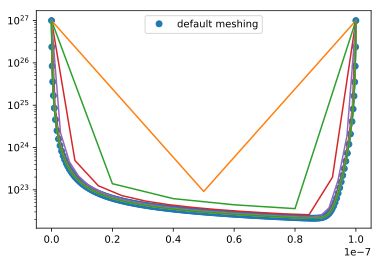

In [4]:
L = 100e-9
lgn = np.linspace(1, 16, 12)
result = []
test_scl(
    mesh1d(L),
    params,
    plot=True,
    plot_args=('o'),
    plot_kwargs=dict(
        label='default meshing'))
for n in 2**lgn:
    j = test_scl(
        mesh1d(np.linspace(0, L, int(n + 1))),
        params,
        plot=True,
        plot_args=('-', ))
    result.append((n, j))
    print(n, j)
plt.legend(loc='upper center')

In [5]:
data = np.asarray(result)
testing.nb_store_array(data)

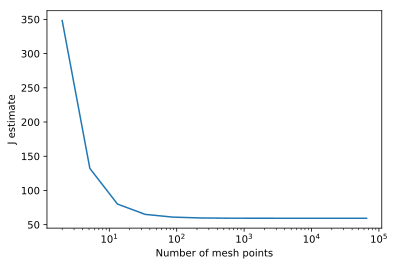

In [6]:
plt.plot(data[:, 0], data[:, 1])
plt.xlabel('Number of mesh points')
plt.ylabel('J estimate')
plt.xscale('log')

In [7]:
h = L / (data[:, 0] + 1)
j = data[:, 1]
jtrue = j[-1]
relative_error = ((j - jtrue)[:-1]) / jtrue
h = h[:-1]
ideal_error = h**2.
# match at the smallest point
ideal_error *= relative_error[-1] / ideal_error[-1]

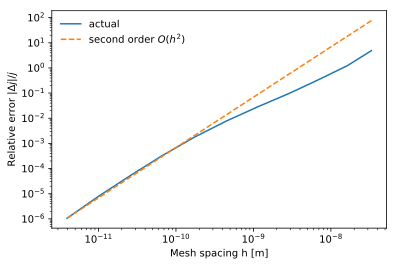

In [8]:
plt.plot(h, relative_error, label='actual')
plt.plot(h, ideal_error, '--', label='second order $O(h^2)$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mesh spacing h [m]')
plt.ylabel('Relative error $|\Delta j|/j$')
plt.legend(loc=0, frameon=False)


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
